# DLVC 2017
# 2nd July 2017, Tutorial 2
# ImageNet Classification (Classical Approach)

#### Dataset: Tiny ImageNet [https://tiny-imagenet.herokuapp.com/]
Tiny Imagenet has 200 classes. Each class has 500 training images, 50 validation images, and 50 test images.

In [1]:
%matplotlib inline
from pylab import *
import pickle
from skimage import feature
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.JPEG')]


In [6]:
train_datasetPath = 'dataset/tiny-imagenet-200/train';
classes = get_immediate_subdirectories(train_datasetPath)
train_img_list = [get_imlist(os.path.join(train_datasetPath,classes[num]+'/images/')) for num in range(len(classes))]
test_datasetPath = 'dataset/tiny-imagenet-200/val';
test_img_list = get_imlist(test_datasetPath)

(64, 64, 3)


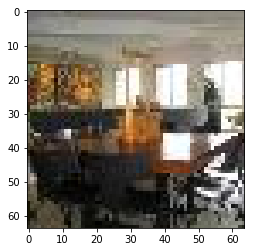

In [8]:
# Displaying sample image
sample_img = imread(train_img_list[0][0])
imshow(sample_img)
print(sample_img.shape)

In [11]:
train_greycoHomFeat = []
train_greycoConFeat = []
train_greycoEnFeat = []
train_greycoCorrFeat = []
train_hogFeat = []
train_lbpFeat = []
for num1 in range(200):
    for num2 in range(len(train_img_list[num1])):
        img = Image.open(train_img_list[num1][num2])
        train_greycoHomFeat.append(feature.greycoprops(feature.greycomatrix(array(img.convert('L')), [1], [np.pi/4],normed=True),prop='homogeneity'))
        train_greycoConFeat.append(feature.greycoprops(feature.greycomatrix(array(img.convert('L')), [1], [np.pi/4],normed=True),prop='contrast'))
        train_greycoEnFeat.append(feature.greycoprops(feature.greycomatrix(array(img.convert('L')), [1], [np.pi/4],normed=True),prop='energy'))
        train_greycoCorrFeat.append(feature.greycoprops(feature.greycomatrix(array(img.convert('L')), [1], [np.pi/4],normed=True),prop='correlation'))
        train_hogFeat.append(feature.hog(array(img.convert('L')), orientations=4, pixels_per_cell=(15,15))) 
        train_lbpFeat.append(feature.local_binary_pattern(array(img.convert('L')), 5, 3)) 

In [44]:
with open('imagenet/train_greycoHomFeat.pkl','wb') as f:
    pickle.dump(train_greycoHomFeat,f)
with open('imagenet/train_greycoConFeat.pkl','wb') as f:
    pickle.dump(train_greycoHomFeat,f)
with open('imagenet/train_greycoEnFeat.pkl','wb') as f:
    pickle.dump(train_greycoEnFeat,f)
with open('imagenet/train_greycoCorrFeat.pkl','wb') as f:
    pickle.dump(train_greycoCorrFeat,f)
with open('imagenet/train_hogFeat.pkl','wb') as f:
    pickle.dump(train_hogFeat,f)
with open('imagenet/train_lbpFeat.pkl','wb') as f:
    pickle.dump(train_lbpFeat,f)

In [ ]:
test_greycoHomFeat = []
test_greycoConFeat = []
test_greycoEnFeat = []
test_greycoCorrFeat = []
test_hogFeat = []
test_lbpFeat = []

for num1 in range(len(test_img_list)):
    img = Image.open(test_img_list[num1])
    train_greycoHomFeat.append(feature.greycoprops(feature.greycomatrix(array(img.convert('L')), [1], [np.pi/4],normed=True),prop='homogeneity'))
    train_greycoConFeat.append(feature.greycoprops(feature.greycomatrix(array(img.convert('L')), [1], [np.pi/4],normed=True),prop='contrast'))
    train_greycoEnFeat.append(feature.greycoprops(feature.greycomatrix(array(img.convert('L')), [1], [np.pi/4],normed=True),prop='energy')
    train_greycoCorrFeat.append(feature.greycoprops(feature.greycomatrix(array(img.convert('L')), [1], [np.pi/4],normed=True),prop='correlation')                          
    train_hogFeat.append(feature.hog(array(img.convert('L')), orientations=4, pixels_per_cell=(15,15)) 
    train_lbpFeat.append(feature.local_binary_pattern(array(img.convert('L')), 5, 3)) 

In [ ]:
with open('imagenet/test_greycoHomFeat.pkl','wb') as f:
    pickle.dump(test_greycoHomFeat,f)
with open('imagenet/test_greycoConFeat.pkl','wb') as f:
    pickle.dump(test_greycoConFeat,f)
with open('imagenet/test_greycoEnFeat.pkl','wb') as f:
    pickle.dump(test_greycoEnFeat,f)
with open('imagenet/test_greycoCorrFeat.pkl','wb') as f:
    pickle.dump(test_greycoCorrFeat,f)
with open('imagenet/test_hogFeat.pkl','wb') as f:
    pickle.dump(test_hogFeat,f)
with open('imagenet/test_lbpFeat.pkl','wb') as f:
    pickle.dump(test_lbpFeat,f)

In [41]:
## Training and testing labels
train_label = np.zeros(len(test_lbpFeat))
t = 0
for num1 in range(200):
    L = len(train_img_list[num1])
    train_label[t:t+L-1] = num1
    t = t+L
    
test_label = np.zeros(len(test_list))
lines = []
with open(os.path.join(test_datasetPath,'val_annotations.txt'),'r') as f:
    for line in f:
        lines.append(line.split())       
test_list = [x[1] for x in lines]
for num2 in range(len(test_list)):
    test_label[num2]= classes.index(test_list[num2])   
    

NameError: name 'test_lbpFeat' is not defined

In [ ]:
# Data
trainFeat = np.zeros((60000,1896))
for num in range(60000):    
    trainFeat[num][:] = np.concatenate((train_greycoHomFeat[num].reshape(1,),train_greycoConFeat[num].reshape(1,),
                            train_greycoEnFeat[num].reshape(1,),train_greycoCorrFeat[num].reshape(1,),
                                        train_hogFeat[num],train_lbpFeat[num].reshape(28*28),train_data[num].reshape(28*28)),axis=0)

testFeat = np.zeros((10000,1896))
for num in range(10000):    
    trainFeat[num][:] = np.concatenate((test_greycoHomFeat[num].reshape(1,),test_greycoConFeat[num].reshape(1,),
                            test_greycoEnFeat[num].reshape(1,),test_greycoCorrFeat[num].reshape(1,),
                                        test_hogFeat[num],test_lbpFeat[num].reshape(28*28),test_data[num].reshape(28*28)),axis=0)
trainFeat_scaled = preprocessing.scale(trainFeat)
testFeat_scaled = preprocessing.scale(testFeat)

In [ ]:
from sklearn.neural_network import MLPClassifier
#scikitlearn documentation for MLP classifier: goo.gl/F1Q1Fa

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=1e-4,
                    solver='sgd', verbose=True, tol=1e-4, random_state=1,
                    learning_rate_init=1e-2)
nn.fit(trainFeat_scaled, train_label)       
prediction = nn.predict(testFeat_scaled)

In [ ]:
print("Training set score: %f" % nn.score(trainFeat_scaled, train_label)) # mean accuracy
print("Test set score: %f" % nn.score(testFeat_scaled, test_label))